<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_cluster_data_multi_delta_(_2)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.493827,60.420716,50.458842,-0.026786,203.346599,203.376367,-0.029768
1,0.0,1.0,95.238774,26.475166,93.873839,-0.036002,225.551777,225.591341,-0.039564
2,0.0,2.0,86.859562,58.590449,73.961782,-0.032065,229.379728,229.413686,-0.033958
3,0.0,3.0,72.434349,39.526409,20.855719,0.035710,142.852186,142.822405,0.029781
4,0.0,4.0,69.741561,92.238774,60.879596,0.001889,232.861820,232.859191,0.002629
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,89.533062,62.831174,63.328643,0.014712,225.707590,225.692457,0.015133
119996,999.0,116.0,33.724499,23.694507,33.036359,0.070289,100.525655,100.457590,0.068066
119997,999.0,117.0,35.602020,58.547933,31.732042,0.041285,135.923280,135.884288,0.038992
119998,999.0,118.0,74.417573,83.085259,72.757654,0.006399,240.266885,240.258919,0.007966


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    82.493827  60.420716  50.458842  ...  203.346599  203.376367 -0.029768
      1.0    95.238774  26.475166  93.873839  ...  225.551777  225.591341 -0.039564
      2.0    86.859562  58.590449  73.961782  ...  229.379728  229.413686 -0.033958
      3.0    72.434349  39.526409  20.855719  ...  142.852186  142.822405  0.029781
      4.0    69.741561  92.238774  60.879596  ...  232.861820  232.859191  0.002629
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  89.533062  62.831174  63.328643  ...  225.707590  225.692457  0.015133
      116.0  33.724499  23.694507  33.036359  ...  100.525655  100.457590  0.068066
      117.0  35.602020  58.547933  31.732042  ...  135.923280  135.884288  0.038992
      118.0  74.417573  83.085259  72.757654  ...  240.266885  240.258919  0.007966
      119.0  25.725382  65.435541  57.930953  ...  159.080605  159.091400 -0.010794

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    82.493827  60.420716  50.458842  ...  203.346599  203.376367 -0.029768
      1.0    95.238774  26.475166  93.873839  ...  225.551777  225.591341 -0.039564
      2.0    86.859562  58.590449  73.961782  ...  229.379728  229.413686 -0.033958
      3.0    72.434349  39.526409  20.855719  ...  142.852186  142.822405  0.029781
      4.0    69.741561  92.238774  60.879596  ...  232.861820  232.859191  0.002629
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  89.533062  62.831174  63.328643  ...  225.707590  225.692457  0.015133
      116.0  33.724499  23.694507  33.036359  ...  100.525655  100.457590  0.068066
      117.0  35.602020  58.547933  31.732042  ...  135.923280  135.884288  0.038992
      118.0  74.417573  83.085259  72.757654  ...  240.266885  240.258919  0.007966
      119.0  25.725382  65.435541  57.930953  ...  159.080605  159.091400 -0.010794

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,82.493827,60.420716,50.458842,-0.026786,203.346599,203.376367,-0.029768
1,0.0,1.0,95.238774,26.475166,93.873839,-0.036002,225.551777,225.591341,-0.039564
2,0.0,2.0,86.859562,58.590449,73.961782,-0.032065,229.379728,229.413686,-0.033958
3,0.0,3.0,72.434349,39.526409,20.855719,0.035710,142.852186,142.822405,0.029781
4,0.0,4.0,69.741561,92.238774,60.879596,0.001889,232.861820,232.859191,0.002629
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,89.533062,62.831174,63.328643,0.014712,225.707590,225.692457,0.015133
119996,999.0,116.0,33.724499,23.694507,33.036359,0.070289,100.525655,100.457590,0.068066
119997,999.0,117.0,35.602020,58.547933,31.732042,0.041285,135.923280,135.884288,0.038992
119998,999.0,118.0,74.417573,83.085259,72.757654,0.006399,240.266885,240.258919,0.007966


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    82.493827  60.420716  50.458842  ...  203.346599  203.376367 -0.029768
      1.0    95.238774  26.475166  93.873839  ...  225.551777  225.591341 -0.039564
      2.0    86.859562  58.590449  73.961782  ...  229.379728  229.413686 -0.033958
      3.0    72.434349  39.526409  20.855719  ...  142.852186  142.822405  0.029781
      4.0    69.741561  92.238774  60.879596  ...  232.861820  232.859191  0.002629
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  89.533062  62.831174  63.328643  ...  225.707590  225.692457  0.015133
      116.0  33.724499  23.694507  33.036359  ...  100.525655  100.457590  0.068066
      117.0  35.602020  58.547933  31.732042  ...  135.923280  135.884288  0.038992
      118.0  74.417573  83.085259  72.757654  ...  240.266885  240.258919  0.007966
      119.0  25.725382  65.435541  57.930953  ...  159.080605  159.091400 -0.010794

[120000 rows x 7 columns]

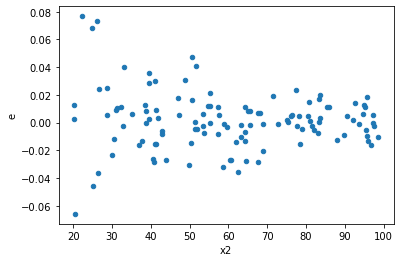

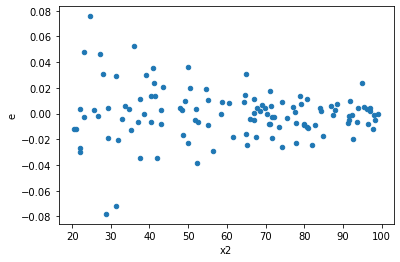

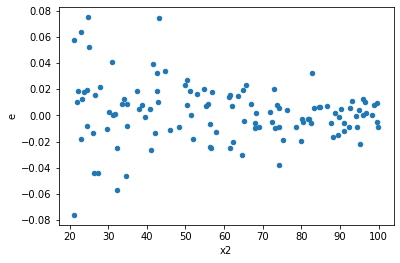

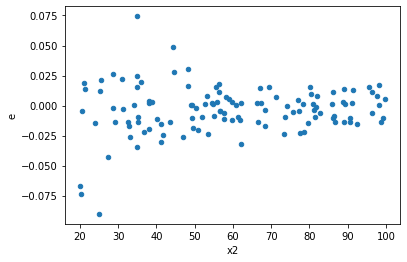

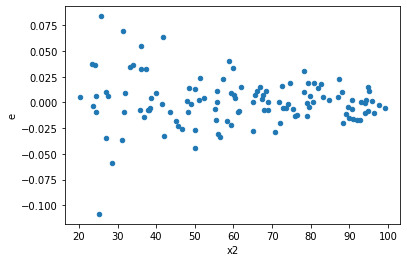

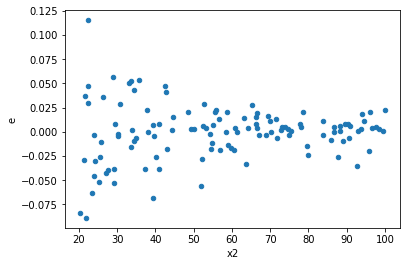

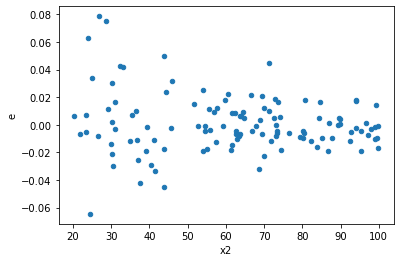

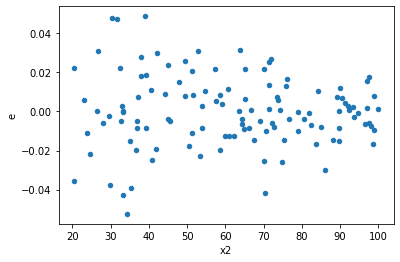

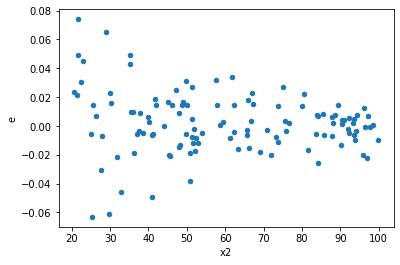

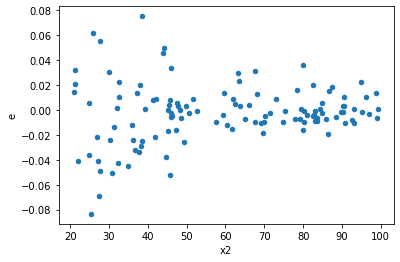

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
3.0,59.0,55.0,0.0069039706653234775,0.039272021064256805,0.00011701645195463521,0.000714036746622851,6.102020140720622,2.2663271259659723e-10,0.9999999998866836,1.1331635629829862e-10,Reject001=0 : Heteroscedasticity
6.0,55.0,59.0,0.01988085189269565,0.03038577361279055,0.0003614700344126482,0.0005150131120811957,1.4247740145819812,0.18282513837230385,0.9085874308138481,0.09141256918615193,Reject001=1 : Homoscedasticity
10.0,52.0,62.0,0.018476762212266764,0.04422547778145012,0.0003553223502358993,0.0007133141577653245,2.0075127761925295,0.008862915850597064,0.9955685420747015,0.004431457925298532,Reject001=0 : Heteroscedasticity
13.0,50.0,64.0,0.01596505971660582,0.030373636974300924,0.0003193011943321164,0.00047458807772345193,1.4863335501019648,0.13456135372187927,0.9327193231390604,0.06728067686093964,Reject001=1 : Homoscedasticity
14.0,55.0,59.0,0.007487795560717883,0.030984600283789087,0.00013614173746759786,0.0005251627166743913,3.8574703573133227,8.01092205238163e-07,0.9999995994538974,4.005461026190815e-07,Reject001=0 : Heteroscedasticity
18.0,54.0,60.0,0.012791866693404486,0.03235187090422406,0.00023688642024823122,0.0005391978484037344,2.2761872455107963,0.0021314047080465137,0.9989342976459767,0.0010657023540232569,Reject001=0 : Heteroscedasticity
19.0,62.0,52.0,0.03440473821260431,0.029053948615691695,0.0005549151324613599,0.0005587297810709941,1.0068742919168812,0.9857586689072892,0.5071206655463554,0.4928793344536446,Reject001=1 : Homoscedasticity
23.0,61.0,53.0,0.01894798433705192,0.01789036105056749,0.00031062269405003146,0.0003375539820861791,1.086700967289305,0.7602522732727719,0.619873863363614,0.38012613663638595,Reject001=1 : Homoscedasticity
26.0,61.0,53.0,0.014078180581693444,0.024432449560234448,0.00023078984560153187,0.0004609896143440462,1.9974432286763764,0.011001535681026908,0.9944992321594865,0.005500767840513454,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,55.0,59.0,0.04049352425715939,0.010158975502168979,0.0007362458955847162,0.00017218602546049117,0.233870268741863,1.9827849271693423e-07,Reject001=0 : Heteroscedasticity
1.0,42.0,72.0,0.020022074263555456,0.027759192511639056,0.0004767160538941775,0.00038554434043943135,0.8087504863534873,0.4607179030608729,Reject001=1 : Homoscedasticity
2.0,56.0,58.0,0.048631703550967076,0.009723737309031068,0.0008684232776958406,0.00016765064325915635,0.19305176123788204,4.8388537952778915e-09,Reject001=0 : Heteroscedasticity
3.0,59.0,55.0,0.0069039706653234775,0.039272021064256805,0.00011701645195463521,0.000714036746622851,6.102020140720622,2.2663271259659723e-10,Reject001=0 : Heteroscedasticity
4.0,53.0,61.0,0.03507870968932037,0.029107488546053203,0.0006618624469683089,0.0004771719433779214,0.7209533424409094,0.22509853615308956,Reject001=1 : Homoscedasticity
5.0,54.0,60.0,0.08458748257271331,0.011539517148003149,0.001566434862457654,0.0001923252858000525,0.12277898711875208,6.974581188256981e-13,Reject001=0 : Heteroscedasticity
6.0,55.0,59.0,0.01988085189269565,0.03038577361279055,0.0003614700344126482,0.0005150131120811957,1.4247740145819812,0.18282513837230385,Reject001=1 : Homoscedasticity
7.0,63.0,51.0,0.023669699358583936,0.014563819764310643,0.0003757095136283164,0.00028556509341785575,0.7600688379170533,0.29923860438092337,Reject001=1 : Homoscedasticity
8.0,48.0,66.0,0.023299992558875292,0.028161586151551458,0.00048541651164323523,0.00042669069926593115,0.8790197470240453,0.6436481900928906,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      524
Reject001=0 : Heteroscedasticity    476
Name: Result_test, dtype: int64